In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from seismic_handler import SeismicPrestack

handler = SeismicPrestack('data/prestack.sgy')


In [3]:
handler.getHeaders()

['data_use',
 'group_coordinate_x',
 'low_cut_frequency',
 'datum_elevation_at_source',
 'mute_time_start_time_in_ms',
 'geophone_group_number_of_last_trace',
 'distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group',
 'source_type_orientation',
 'uphole_time_at_group_in_ms',
 'water_depth_at_source',
 'geophone_group_number_of_roll_switch_position_one',
 'delay_recording_time',
 'trace_number_within_the_original_field_record',
 'transduction_constant_mantissa',
 'scalar_to_be_applied_to_times',
 'weathering_velocity',
 'sweep_trace_taper_length_at_end_in_ms',
 'sweep_frequency_at_end',
 'total_static_applied_in_ms',
 'number_of_vertically_summed_traces_yielding_this_trace',
 'number_of_samples_in_this_trace',
 'source_energy_direction_exponent',
 'transduction_units',
 'y_coordinate_of_ensemble_position_of_this_trace',
 'scalar_to_be_applied_to_all_coordinates',
 'source_coordinate_y',
 'second_of_minute',
 'trace_sequence_number_within_line',
 'year_data_recorde

In [4]:
vals = handler.getHeaderVals ('original_field_record_number')
vals

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

In [5]:
handler.getHeaderIndex (vals[int(len(vals)/2)])

[9626,
 9627,
 9628,
 9629,
 9630,
 9631,
 9632,
 9633,
 9634,
 9635,
 9636,
 9637,
 9638,
 9639,
 9640,
 9641,
 9642,
 9643,
 9644,
 9645,
 9646,
 9647,
 9648,
 9649,
 9650,
 9651,
 9652,
 9653,
 9654,
 9655,
 9656,
 9657,
 9658,
 9659,
 9660,
 9661,
 9662,
 9663,
 9664,
 9665,
 9666,
 9667,
 9668,
 9669,
 9670,
 9671,
 9672,
 9673,
 9674,
 9675,
 9676,
 9677,
 9678,
 9679,
 9680,
 9681,
 9682,
 9683,
 9684,
 9685,
 9686,
 9687,
 9688,
 9689,
 9690,
 9691,
 9692,
 9693,
 9694,
 9695,
 9696,
 9697,
 9698,
 9699,
 9700,
 9701,
 9702,
 9703,
 9704,
 9705,
 9706,
 9707,
 9708,
 9709,
 9710,
 9711,
 9712,
 9713,
 9714,
 9715,
 9716,
 9717,
 9718,
 9719,
 9720,
 9721,
 9722,
 9723,
 9724,
 9725,
 9726,
 9727,
 9728,
 9729,
 9730,
 9731,
 9732,
 9733,
 9734,
 9735,
 9736,
 9737,
 9738,
 9739,
 9740,
 9741,
 9742,
 9743,
 9744,
 9745,
 9746,
 9747,
 9748,
 9749,
 9750,
 9751,
 9752,
 9753,
 9754,
 9755,
 9756,
 9757,
 9758,
 9759,
 9760,
 9761,
 9762,
 9763,
 9764,
 9765,
 9766,
 9767,
 9768,

<module 'matplotlib.pyplot' from 'C:\\Users\\kostyad\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

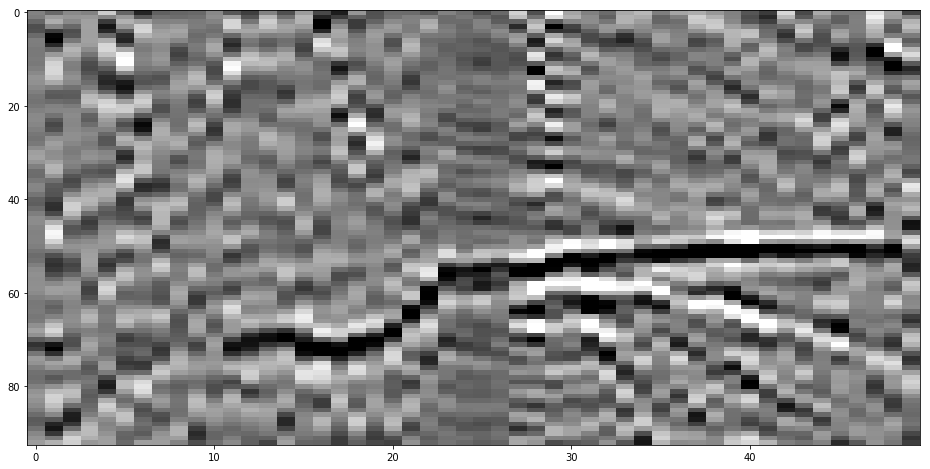

In [16]:
parts = handler.readGatherParts (vals[int(len(vals)/2)], 50, 0.5)

data = parts[int(len(parts)/2)]

handler.plot(data)

<module 'matplotlib.pyplot' from 'C:\\Users\\kostyad\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

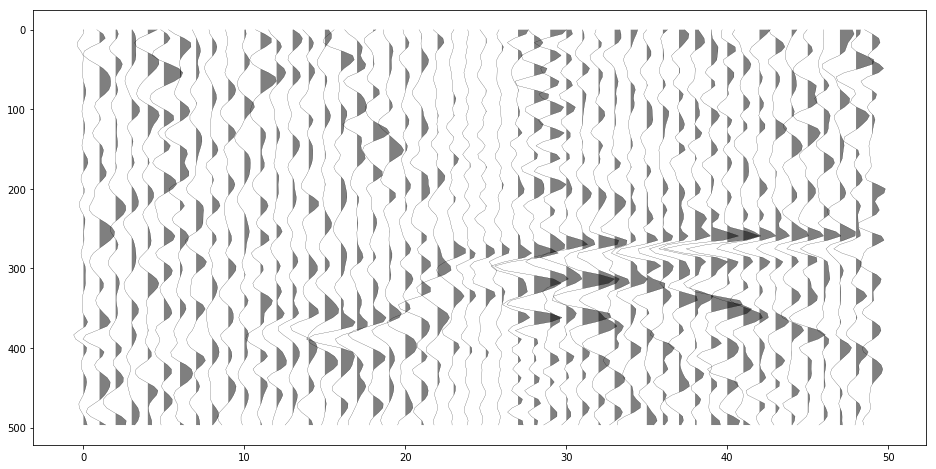

In [17]:
handler.wiggle_plot(data)

<module 'matplotlib.pyplot' from 'C:\\Users\\kostyad\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

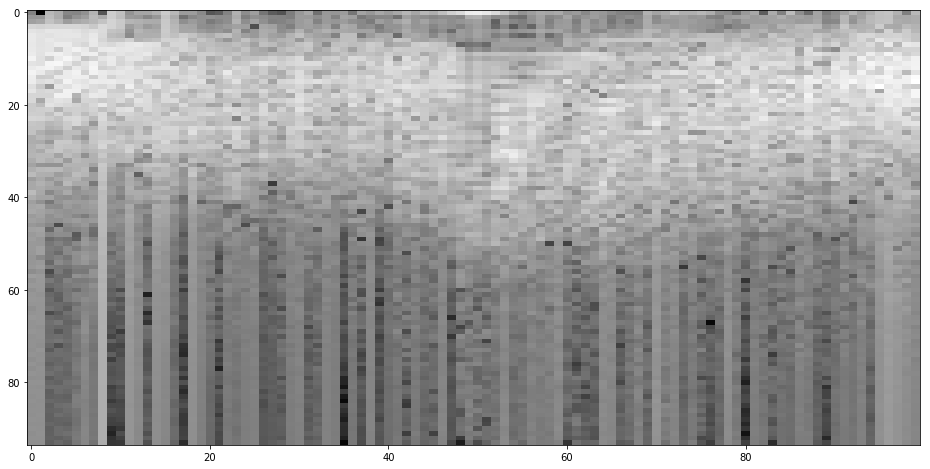

In [9]:
db_matrix = handler.spectrogram (data)
handler.plot_spec(db_matrix.T)

<module 'matplotlib.pyplot' from 'C:\\Users\\kostyad\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

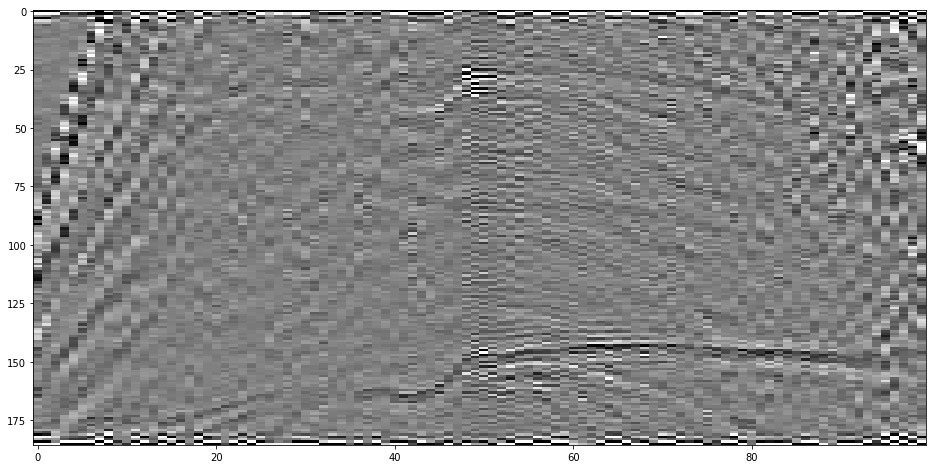

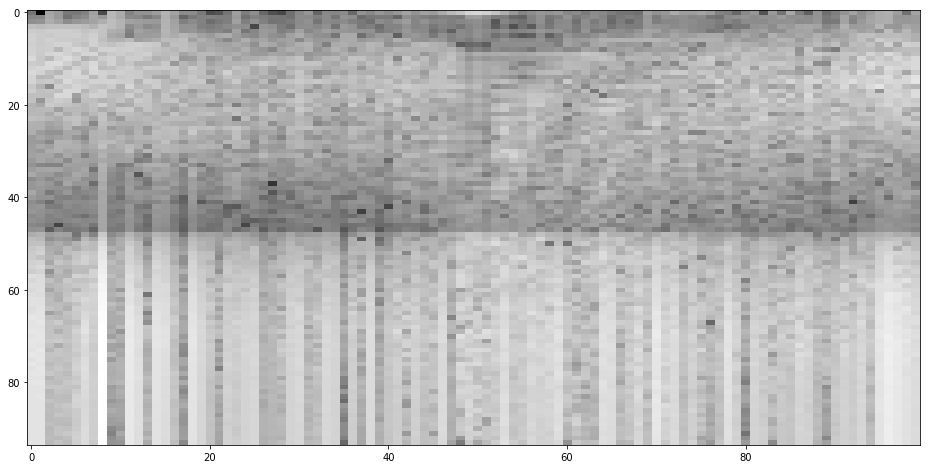

In [10]:
data_noise = handler.addNoise(data)
handler.plot (data_noise)
db_matrix_noise = handler.spectrogram (data_noise)
handler.plot_spec(db_matrix_noise.T)

<module 'matplotlib.pyplot' from 'C:\\Users\\kostyad\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

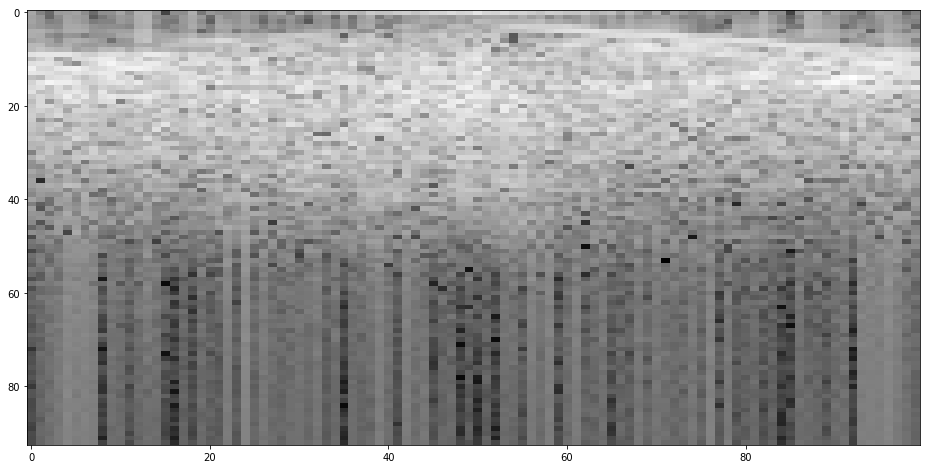

In [11]:
fk_spec = handler.fk (data)

handler.plot_spec(fk_spec)

prepare images

In [20]:
import os

images_dir = 'images/'

if os.path.exists(images_dir):
    import shutil
    shutil.rmtree(images_dir)

if not os.path.exists(images_dir):
    os.makedirs(images_dir)

train_data_dir = images_dir + 'train/'
validation_data_dir = images_dir + 'validation/'
    
if not os.path.exists(train_data_dir):
    os.makedirs(train_data_dir)

if not os.path.exists(validation_data_dir):
    os.makedirs(validation_data_dir)
    
image = SeismicPrestack.convert_to_image (parts[0].T)
image_size = image.size
image.save (images_dir + '/test.png')
    
counter = 0

vals = handler.getHeaderVals ('original_field_record_number')
for v in vals:

    parts = handler.readGatherParts (v, 50, 0.5)
    nparts = len(parts)
    for i in range(nparts):  
        if i < nparts*0.8:
            png_name = train_data_dir
        else:
            png_name = validation_data_dir

        data = parts[i]
        if i % 2 == 0:
            png_name += 'noise/'
            data = handler.addNoise (data)
        else:
            png_name += 'norm/'

        if not os.path.exists(png_name):
            os.makedirs(png_name)

        png_name += str(counter) + '.png'

        image = SeismicPrestack.convert_to_image (data.T)

        image.save (png_name)

        counter = counter+1

C:\Users\kostyad\Documents\Jupyter\seismic_fingerprint\seismic_handler.py:110: RuntimeWarning: divide by zero encountered in true_divide
  data = data * 255 / np.max(data)
C:\Users\kostyad\Documents\Jupyter\seismic_fingerprint\seismic_handler.py:110: RuntimeWarning: invalid value encountered in true_divide
  data = data * 255 / np.max(data)
C:\Users\kostyad\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:95: RuntimeWarning: invalid value encountered in less
  if cscale < 0:
